# Gaussian Processes
This notebook will be used to get used to working with and understanding how GPs work.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Writing out example mean function and covariance function
def m(x):
    """ Example mean function"""
    return 0.25*np.square(x)

def K(x, x_prime):
    """Example covariance function"""
    n, m = len(x), len(x_prime)
    K = np.zeros((n, m))
    for i, xi in enumerate(x):
        for j, xj in enumerate(x_prime):
            K[i, j] = np.exp(-0.5*np.square(xi - xj))
    return K

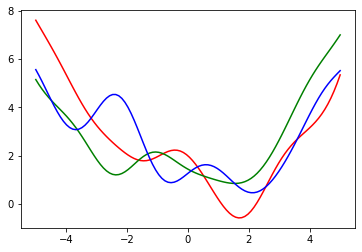

In [20]:
# Generating Gaussian Process
xs = np.linspace(-5, 5, 100).reshape(-1, 1) # x values to generate normal distributions for
ns = len(xs)
keps = 1e-9 # to keep numerical stability

# Create 3 function represented by a multivariate gaussian
fig = plt.figure()
colors = ['red', 'green', 'blue']
for i in range(3):
    fs = m(xs) + np.linalg.cholesky(K(xs, xs) + keps*np.identity(ns)) @ np.random.normal(size=(ns, 1))
    plt.plot(xs, fs, color=colors[i])
# Plotting 99% confidence interval

plt.show()